# AI Community @ Семинар  №2
## Пример использования numpy 

Numpy - библиотека для Python, позволяющая совершать операции с многомерными матрицами (тензорами) эффективно и удобно

# Базовая алгебра в numpy

In [1]:
import numpy as np
import numpy.linalg as nplg
from scipy import linalg

In [13]:
A = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])
b = np.array([3, 5])
print('A:\n{}, \nb:\n{}'.format(A, b))

A:
[[1 2]
 [3 4]
 [5 6]], 
b:
[3 5]


In [8]:
print('Размер A:{}, размер b:{}'.format(A.shape, b.shape))

Размер A:(3, 2), размер b:(1, 2)


## Умножение матрицы на вектор

In [15]:
c = A.dot(b)
c = A @ b

# c = np.dot(A, c)
print('c:\n{}'.format(c))

c:
[13 29 45]


In [16]:
B = np.array([[1, 7], [4, 9]])

## Умножение матрицы на матрицу

In [17]:
C = A.dot(B)
print('C:\n{}'.format(C))

C:
[[ 9 25]
 [19 57]
 [29 89]]


## Поэлементное перемножение двух матриц

In [18]:
print(A, '\n')
print(C, '\n')

print(A * C)

[[1 2]
 [3 4]
 [5 6]] 

[[ 9 25]
 [19 57]
 [29 89]] 

[[  9  50]
 [ 57 228]
 [145 534]]


## Транспонирование

In [19]:
C

array([[ 9, 25],
       [19, 57],
       [29, 89]])

In [20]:
C.T

array([[ 9, 19, 29],
       [25, 57, 89]])

## Обратная матрица
#### Обратная матрица определена только для квадратных матриц
#### Мы поговорим про это на следующих занятиях

In [21]:
print(linalg.inv(B), '\n')
print(nplg.inv(B))

[[-0.47368421  0.36842105]
 [ 0.21052632 -0.05263158]] 

[[-0.47368421  0.36842105]
 [ 0.21052632 -0.05263158]]


## Эксперимент с производительностью вычислений

In [22]:
np.random.seed(23)
np.random.randint(0, 9, size=(5, 5))

array([[3, 6, 8, 6, 8],
       [7, 3, 6, 1, 2],
       [5, 5, 0, 5, 0],
       [3, 1, 7, 4, 1],
       [1, 4, 6, 7, 3]])

Создание двух больших матриц с помощью numpy

In [23]:
M, N, K = 2000, 1000, 4000

In [24]:
Big_A = np.random.random(size=(M, N))
Big_B = np.random.random(size=(N, K))

In [25]:
import time

Проверим время перемножения двух больших матриц с помощью numpy

In [26]:
start_time = time.time()
C_Big = Big_A.dot(Big_B)
numpy_calc_time = time.time() - start_time
print('Numpy multiplication time: {}'.format(numpy_calc_time))

Numpy multiplication time: 0.12894225120544434


In [27]:
import random as rnd

Напишем свои простейшие реализации создания и перемножения двух матриц

In [28]:
def create_random_matrix(shape):
    A = []
    for i in range(shape[0]):
        A_row = [rnd.random() for _ in range(shape[1])]
        A.append(A_row)
    return A

In [29]:
My_Big_A = create_random_matrix(shape=(M, N))
My_Big_B = create_random_matrix(shape=(N, K))

In [30]:
def multiply_matrices(A, B):
    m, n, k = len(A), len(A[0]), len(B[0])
    
    C = []
    for i in range(m):
        row_sum = 0.
        C.append([])
        for j in range(k):
            for p in range(n):
                row_sum += A[i][p] * B[p][j]
            C[i].append(row_sum)
    
    return C

Замерим время перемножения матриц нашим алгоритмом

In [31]:
start_time = time.time()
My_Big_C = multiply_matrices(My_Big_A, My_Big_B)
my_calc_time = time.time() - start_time
print('My multiplication time: {}'.format(my_calc_time))

KeyboardInterrupt: 

Если вы не меняли размерность матриц, то можете заметить, что время, затрачиваемое на выполнение этой задачи на читом python превосходит все мысленные гранницы. В дальнейшем вам часто придётся с этим сталкиваться с такой ситуацией, поэтому нужно использовать логгер, который будет выводить статус процесса. Для этого очень часто используют tqdm

In [32]:
!pip install tqdm
from tqdm import tqdm_notebook, tqdm

In [33]:
def multiply_matrices_tqdm(A, B):
    m, n, k = len(A), len(A[0]), len(B[0])
    
    C = []
    # оборачиваем итератор функцией tqdm_notebook
    for i in tqdm_notebook(range(m)):
        row_sum = 0.
        C.append([])
        for j in range(k):
            for p in range(n):
                row_sum += A[i][p] * B[p][j]
            C[i].append(row_sum)
    
    return C

In [34]:
start_time = time.time()
My_Big_C = multiply_matrices_tqdm(My_Big_A, My_Big_B)
my_calc_time = time.time() - start_time
print('My multiplication time: {}'.format(my_calc_time))

KeyboardInterrupt: 

Сравним время работы

In [ ]:
print('Speed up: {}'.format(my_calc_time / numpy_calc_time))

Мы потратили 20 минут на собственную реализацию, которая при том еще и работает в тысячу с лишним раз медленнее, чем реализация `numpy`. Теперь вы понимаете, как вам может пригодиться `numpy` в реальных задачах.

## Создание матриц

#### Матрица из единиц размером 2х3

In [35]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

#### Матрица из нулей размером 2х3

In [36]:
np.zeros(shape=(2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

#### Единичная матрица размера 5x5

In [38]:
a = np.eye(5, 3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Можно задавать тип элементов внутри матрицы

In [40]:
a = np.eye(5, 5, dtype='int8')
print(a)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [41]:
print(np.ones_like(a), '\n')
print(np.zeros_like(a))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]] 

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### Индексация и срезы

In [42]:
# !pip install matplotlib
# !pip install skimage

from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def plot_images(imgs, names=None):        
    fig, axs = plt.subplots(ncols=len(imgs), figsize=(16, 8))
    for i, ax in enumerate(axs):
        ax.imshow(imgs[i])
        if names and i < len(names):
            ax.set_title(names[i], fontsize=15)
    plt.show()

Изображение представляется той же матрицей, или ее обобщением, называемым тензором. Для более ясного преставления дальнеших операций, будем работать с изображениями.

In [44]:
img = imread('data/lemur.jpg')

In [45]:
type(img)

imageio.core.util.Array

In [46]:
img.shape

(1184, 1920, 3)

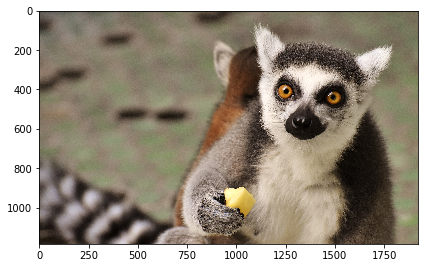

In [47]:
imshow(img)

#### Выполняем различные срезы по изображению

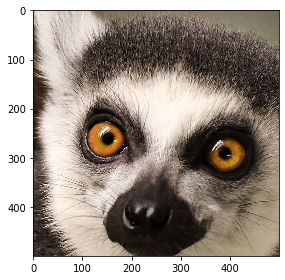

In [48]:
imshow(img[150:650, 1100:1600])

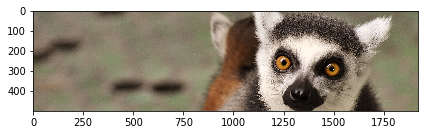

In [49]:
imshow(img[150:650, :])

#### Посмотрим на цветовые компоненты изображения (RGB)

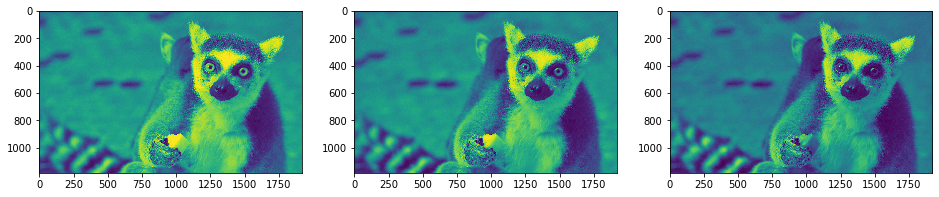

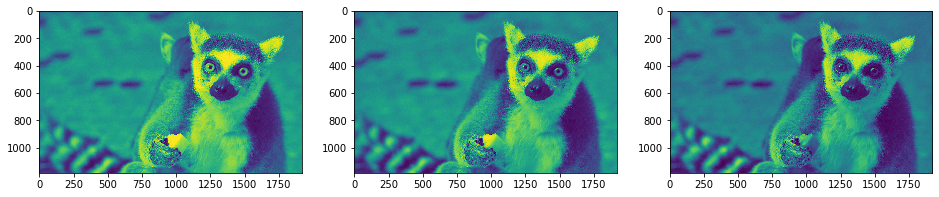

In [50]:
plot_images([img[:, :, 0], img[:, :, 1], img[:, :, -1]])
# Аналогичная операция
plot_images([img[..., 0], img[..., 1], img[..., -1]])

#### Применение масок к изображению

(1184, 1920, 3)
(1184, 1920)


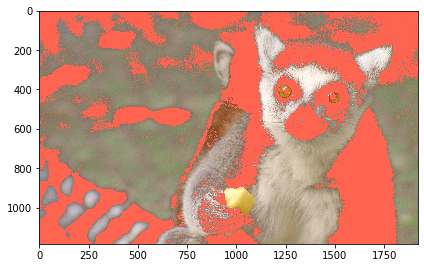

In [55]:
dst = img.copy()

white_mask = img > 128
print(white_mask.shape)
white_mask = ~white_mask
white_mask = white_mask.all(axis=2)
print(white_mask.shape)

dst[white_mask] = [255, 100, 80]
imshow(dst)

In [56]:
from skimage import draw

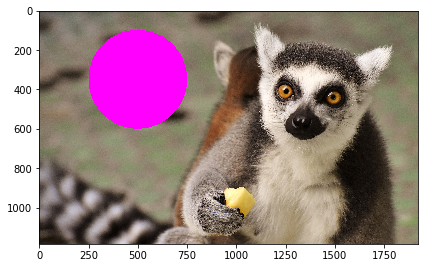

In [57]:
dst = img.copy()
rr, cc = draw.circle(r=350, c=500, radius=250)
dst[rr, cc] = [255, 0, 255] 
imshow(dst)

### Еще немного numpy

#### Создадим вектор из 16 элементов [0; 16)

In [58]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### Поменяем его shape

In [59]:
b = a.reshape((4, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### Выпрямим его обратно

In [60]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### Можем сохранять и загружать матрицы numpy

In [61]:
np.save('data/lemur_processed', dst)

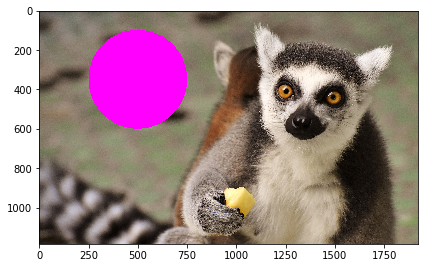

In [62]:
lemur_loaded = np.load('data/lemur_processed.npy')
imshow(lemur_loaded)

In [82]:
a = np.ones((5, 4))
b = np.array([1, 2, 3, 4, 5])

In [94]:
def f(array):
    if array:
        print('Everything is ok')
    else:
        print('Everything is bad')

In [113]:
a = np.random.random((4, 5))
b = np.ones((4, 5))

In [83]:
a.shape, b.shape

((5, 4), (5,))

In [115]:
a < 0.5

array([[ True,  True,  True,  True, False],
       [False, False,  True,  True, False],
       [ True,  True, False, False,  True],
       [False, False, False,  True,  True]])

In [114]:
np.where(a < 0.5, b, a)

array([[1.        , 1.        , 1.        , 1.        , 0.73828389],
       [0.54700026, 0.9883593 , 1.        , 1.        , 0.60693239],
       [1.        , 1.        , 0.77691296, 0.84941046, 1.        ],
       [0.87155588, 0.50163022, 0.74120279, 1.        , 1.        ]])

In [84]:
a*b

ValueError: operands could not be broadcast together with shapes (5,4) (5,) 

In [74]:
np.ones((5, 4)).shape

(5, 4)

In [78]:
np.array([[1, 2, 3, 4, 5]]).T.shape

(5, 1)

In [71]:
np.ones((5, 5)) * np.array([[1, 2, 3, 4, 5]]).T

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.]])